## **AIVLE School 미니프로젝트 5기 AI트랙 2차** ##
## **공공데이터를 활용한 <span style="color:skyblue">미세먼지 농도</span> 예측**
---
## [step 1,2] 데이터 분석 및 전처리

## **0.프로젝트 소개**

### (1) 수행 목표
- 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요.

#### 우리가 풀어야 하는 문제는 무엇인가요?
* 서울 지역의 미세먼지 데이터와 날씨 데이터를 활용하여, 미세먼지 예측에 관련 있는 데이터 항목으로 데이터를 구성, 전처리 하여 미세먼지 농도를 예측하는 머신러닝 모델 구현

### (2) 데이터 소개

#### 1) 기본 데이터

* 학습 데이터
    * air_2022.csv : 2022년 미세먼지 데이터
    * weather_2022.csv : 2022년 날씨 데이터
* 테스트 데이터
    * air_2023.csv : 2023년 미세먼지 데이터
    * weather_2023.csv : 2023년 날씨 데이터

#### 2) 데이터셋의 변수 소개(weather_2022,2023)

* 증기압: 증기가 고체 또는 액체와 동적 평형 상태에 있을 때 증기의 압력 (증기가 되려는 힘)
* 이슬점 온도: 불포화 상태의 공기가 냉각될 때, 포화 상태에 도달하여 수증기의 응결이 시작되는 온도
* 일조: 일정한 물체나 땅의 겉면에 태양 광선이 비치는 시간 (1시간 중 비율)
* 일사(량): 태양으로부터 오는 태양 복사 에너지가 지표에 닿는 양 (면적당 에너지 량)
* 전운량: 하늘을 육안으로 관측하여 전부 구름일 때 10, 구름이 덮고 있는 하늘의 비율에 따라 0~10
* 중하층운량: 중층과 하층에 있는 구름의 분포량(중하층 구름이 날씨에 영향 주므로 따로 표기)
* 운형(운형약어): 구름의 종류. 약어 코드로 기재됨
* 최저운고: 가장 낮은 구름의 높이
* 현상번호(국내식): 비, 소낙비, 싸락눈, 눈보라 등의 기상현상을 나타낸 코드번호
* 지면온도: 지면 0cm 온도
* 지중온도: 땅 속 온도변수1

## **1.환경설정**

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.)
        * 2) 구글 코랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
            
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정
* 로컬환경 또는 구글 코랩 중 하나를 사용하시면 됩니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
path = 'C:/Users/User/project/'

#### 2) 구글 코랩 수행

* 구글 드라이브 연결

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 라이브러리 설치 및 로딩

In [4]:
# 필요한 라이브러리 설치 및 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



In [5]:
# 시각화 한글폰트 설정을 위해 아래 코드를 실행하세요.
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### (3) 데이터 불러오기
* Pandas 라이브러리를 활용해서 'air_2022.csv'파일을 'air_22' 변수에,'air_2023.csv'파일을 'air_23' 변수에 저장하고 그 데이터를 확인하세요.
<br> ( 구분자(sep) : ',' / encoder = 'utf-8' / index_col = 0 )

* Pandas 라이브러리를 활용해서 'weather_2022.csv'파일을 'weather_22' 변수에,'weather_2023.csv'파일을 'weather_23' 변수에 저장하고 그 데이터를 확인하세요.
<br> ( 구분자(sep) : ',' / encoder = 'cp949' )

#### 1) 데이터로딩

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 데이터 로딩

air_22 = pd.read_csv(path +"air_2022.csv", sep=',', index_col = 0, encoding = 'utf-8' )
air_23 = pd.read_csv(path +"air_2023.csv", sep=',', index_col = 0, encoding = 'utf-8' )
weather_22 = pd.read_csv(path +"weather_2022.csv", sep = ',', encoding='cp949')
weather_23 = pd.read_csv(path + "weather_2023.csv", sep = ',', encoding='cp949')

#### 2) 기본 정보 조회
- 데이터를 head, tail. describe, info 등을 활용하여 확인하세요.

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22.head()


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19


In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22.tail()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
8755,서울 종로구,도시대기,111123,종로구,2022123120,0.004,1.5,0.002,0.070,71.0,59.0,서울 종로구 종로35가길 19
8756,서울 종로구,도시대기,111123,종로구,2022123121,0.005,1.6,0.002,0.070,76.0,62.0,서울 종로구 종로35가길 19
8757,서울 종로구,도시대기,111123,종로구,2022123122,0.004,1.7,0.002,0.072,76.0,66.0,서울 종로구 종로35가길 19
8758,서울 종로구,도시대기,111123,종로구,2022123123,0.005,1.8,0.002,0.072,77.0,67.0,서울 종로구 종로35가길 19
8759,서울 종로구,도시대기,111123,종로구,2022123124,0.004,1.6,0.002,0.070,76.0,67.0,서울 종로구 종로35가길 19


In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
weather_22.tail()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
8755,108,서울,2022-12-31 19:00,-0.2,NaN,NaN,9.0,1.8,NaN,20,...,NaN,1211,NaN,NaN,-0.9,NaN,-0.1,-0.5,-0.5,0.6
8756,108,서울,2022-12-31 20:00,-0.8,NaN,NaN,9.0,1.4,NaN,20,...,14.0,1171,NaN,NaN,-1.8,NaN,-0.1,-0.5,-0.5,0.6
8757,108,서울,2022-12-31 21:00,-1.0,NaN,NaN,9.0,0.9,NaN,340,...,13.0,1134,NaN,NaN,-2.8,NaN,-0.2,-0.5,-0.5,0.6
8758,108,서울,2022-12-31 22:00,-0.8,NaN,NaN,9.0,0.5,NaN,290,...,13.0,1094,NaN,NaN,-2.2,NaN,-0.3,-0.5,-0.5,0.6
8759,108,서울,2022-12-31 23:00,-0.2,NaN,NaN,9.0,1.3,NaN,230,...,14.0,1314,NaN,NaN,-2.1,NaN,-0.3,-0.5,-0.5,0.6


In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22.describe()

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,8760.0,8.760000e+03,8673.000000,8673.000000,8673.000000,8673.000000,8604.000000,8655.000000
mean,111123.0,2.022067e+09,0.003133,0.473458,0.030759,0.021319,31.756044,19.284575
std,0.0,3.450216e+04,0.000700,0.183086,0.019796,0.013473,22.466954,14.172678
min,111123.0,2.022010e+09,0.001000,0.200000,0.001000,0.003000,3.000000,1.000000
25%,111123.0,2.022040e+09,0.003000,0.400000,0.017000,0.011000,19.000000,10.000000
50%,111123.0,2.022070e+09,0.003000,0.400000,0.029000,0.017000,28.000000,16.000000
75%,111123.0,2.022100e+09,0.003000,0.500000,0.042000,0.028000,40.000000,25.000000
max,111123.0,2.022123e+09,0.008000,1.800000,0.144000,0.074000,385.000000,121.000000


In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8673 non-null   float64
 6   CO      8673 non-null   float64
 7   O3      8673 non-null   float64
 8   NO2     8673 non-null   float64
 9   PM10    8604 non-null   float64
 10  PM25    8655 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB


## **2.EDA 1단계 - 데이터 기본 탐색 및 분석**

* 단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

    * <span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

        1. 변수가 내포하고 있는 의미
        2. 변수가 수치형인지, 범주형인지
        3. 결측치 존재 여부 및 조치 방안
        4. 기초 통계량 확인
        5. 데이터 분포 확인
        6. 위 정보로부터 파악한 내용 정리
        7. 추가 분석사항 도출

### (1) 변수별 단변량 분석
- 4 ~ 5개 변수를 뽑아 확인해보세요 

#### 1) Feature1 : 측정일시

In [12]:
var = '측정일시'
temp = air_22[var]

변수가 내포하고 있는 의미
- 미세먼지 데이터 측정 일시, 시간 단위

변수가 수치형인지 범주형인지
- 날짜는 범주형? 수치형?

In [13]:
temp.unique()

array([2022010101, 2022010102, 2022010103, ..., 2022123122, 2022123123,
       2022123124], dtype=int64)

변수의 결측치 존재 여부 및 조치 방안

In [14]:
temp.info

<bound method Series.info of 0       2022010101
1       2022010102
2       2022010103
3       2022010104
4       2022010105
           ...    
8755    2022123120
8756    2022123121
8757    2022123122
8758    2022123123
8759    2022123124
Name: 측정일시, Length: 8760, dtype: int64>

In [15]:
temp.isnull().sum()

0

변수의 기초 통계량 확인

In [16]:
temp.describe()

count    8.760000e+03
mean     2.022067e+09
std      3.450216e+04
min      2.022010e+09
25%      2.022040e+09
50%      2.022070e+09
75%      2.022100e+09
max      2.022123e+09
Name: 측정일시, dtype: float64

변수의 분포 확인

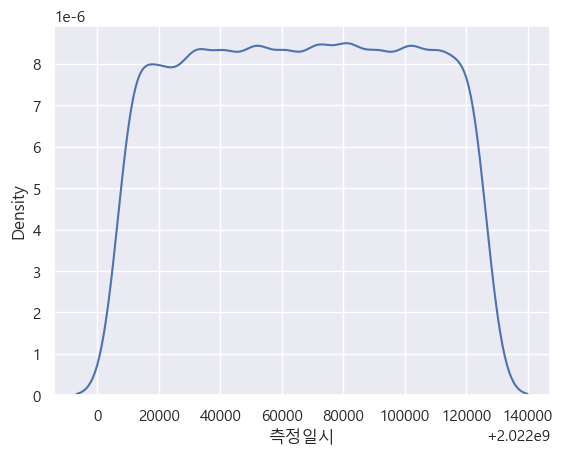

In [17]:
sns.kdeplot(temp)
plt.show()

위 정보로 부터 파악한 내용 정리
- 데이터의 '측정일시' 열은 8760개 row로 구성되어있으며 결측치는 없음

#### 2) Feature2 : SO2

변수가 내포하고 있는 의미
- 이산화황 농도


In [18]:
var = 'SO2'
temp = air_22[var]
temp.head()

0    0.003
1    0.003
2    0.003
3    0.003
4    0.003
Name: SO2, dtype: float64

변수가 수치형인지 범주형인지
- 농도 데이터는 수치형? 범주형?

변수의 결측치 존재 여부 및 조치방안

In [19]:
temp.isnull().sum()

87

결측치 87건 존재

변수의 기초 통계량 확인

In [20]:
temp.describe()

count    8673.000000
mean        0.003133
std         0.000700
min         0.001000
25%         0.003000
50%         0.003000
75%         0.003000
max         0.008000
Name: SO2, dtype: float64

변수의 분포 확인

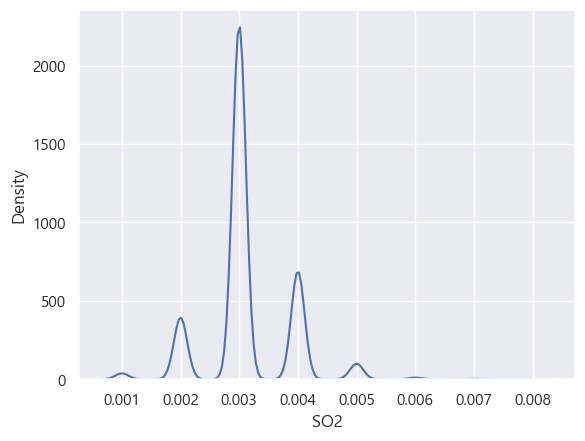

In [21]:
sns.kdeplot(temp)
plt.show()

위 정보로 부터 파악한 내용 정리
- 주어진 데이터셋의 이산화황 농도는 0.001 부터 0.008까지 분포 한다


#### 3) Feature3 : CO

변수가 내포하고 있는 의미
- 일산화탄소 농도


In [22]:
var = 'CO'
temp = air_22[var]
temp.head()

0    0.4
1    0.4
2    0.5
3    0.5
4    0.5
Name: CO, dtype: float64

변수가 수치형인지 범주형인지
- 농도 데이터는 수치형? 범주형?

변수의 결측치 존재 여부 및 조치방안

In [23]:
temp.isnull().sum()

87

결측치 87건 존재

변수의 기초 통계량 확인

In [24]:
temp.describe()

count    8673.000000
mean        0.473458
std         0.183086
min         0.200000
25%         0.400000
50%         0.400000
75%         0.500000
max         1.800000
Name: CO, dtype: float64

변수의 분포 확인

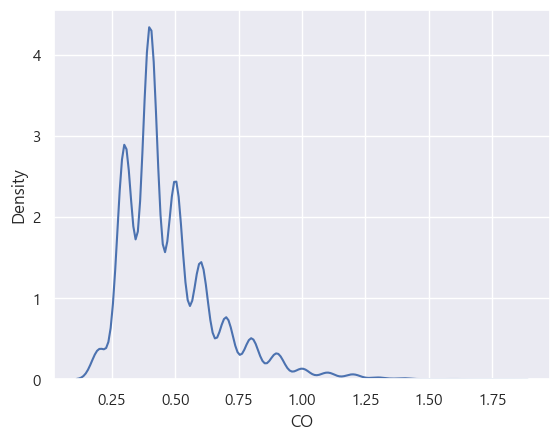

In [25]:
sns.kdeplot(temp)
plt.show()

위 정보로 부터 파악한 내용 정리
- 주어진 데이터셋의 일산화탄소 농도는 0.2 부터 1.8까지 분포 한다


#### 4) Feature4 : PM10

변수가 내포하고 있는 의미
- 미세먼지 농도

In [26]:
var = 'PM10'
temp = air_22[var]
temp.head()

0    23.0
1    20.0
2    20.0
3    19.0
4    24.0
Name: PM10, dtype: float64

변수가 수치형인지 범주형인지
- 수치형

In [27]:
temp.unique()

array([ 23.,  20.,  19.,  24.,  27.,  26.,  22.,  28.,  29.,  36.,  34.,
        35.,  38.,  41.,  42.,  33.,  32.,  56.,  58.,  55.,  43.,  31.,
        25.,  18.,  21.,  37.,  nan,  30.,  40.,  44.,  47.,  46.,  39.,
        45.,  48.,  63.,  64.,  61.,  57.,  52.,  50.,  49.,  53.,  51.,
        54.,  62.,  60.,  67.,  90., 101., 106., 111., 120., 128., 139.,
       140., 133., 134., 138., 122., 123., 110., 112.,  97.,  88.,  84.,
        82.,  87.,  98.,  94., 100., 107., 103., 124.,  68.,  86.,  93.,
        15.,  72.,  81.,  75.,  17.,  66.,  70.,  74.,  80.,  79.,  83.,
        65.,  13.,  11.,  12.,  14.,  73.,  69.,  16.,  71.,  59., 102.,
        92.,  95.,  85.,  91.,  99., 105., 118., 115., 108.,  96.,  89.,
       150., 158., 135., 182., 239., 188., 121.,  78.,  76.,  77.,   3.,
         5.,   7.,  10.,   8.,   9.,   6.,   4., 129., 125., 153., 179.,
       206., 214., 209., 187., 163., 157., 146., 155., 161., 151., 148.,
       132., 147., 184., 285., 305., 267., 241., 29

변수의 결측치 존재 여부 및 조치방안

In [28]:
temp.isnull().sum()

156

결측치 156건 존재 -> 어떻게 채울 것인지??

변수의 기초 통계량 확인

In [29]:
temp.describe()

count    8604.000000
mean       31.756044
std        22.466954
min         3.000000
25%        19.000000
50%        28.000000
75%        40.000000
max       385.000000
Name: PM10, dtype: float64

변수의 분포 확인

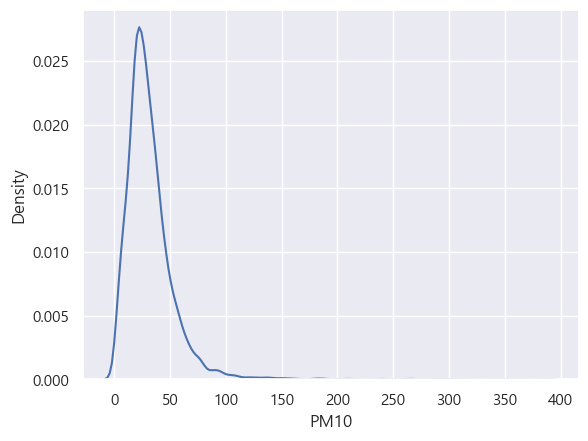

In [30]:
sns.kdeplot(temp)
plt.show()

위 정보로 부터 파악한 내용 정리
- 데이터셋 내부에서는 대부분 미세먼지 값이 200이하에 분포한다.
- 미세먼지 값의 최대값과 최소값을 알 수 있음 

#### 5) Feature5 : PM25


변수가 내포하고 있는 의미
- 초미세먼지 농도

In [31]:
var = 'PM25'
temp = air_22[var]
temp.head()

0    12.0
1     9.0
2     9.0
3    10.0
4    11.0
Name: PM25, dtype: float64

변수가 수치형인지 범주형인지
- 수치형

In [32]:
temp.unique()

array([ 12.,   9.,  10.,  11.,  14.,  16.,  17.,  15.,  18.,  20.,  21.,
        22.,  19.,  23.,  29.,  26.,  24.,  25.,  30.,  45.,  46.,  43.,
        33.,  27.,  13.,  nan,  28.,  32.,  31.,  36.,  34.,  37.,  35.,
        47.,  51.,  40.,  38.,  39.,  41.,  42.,  48.,  49.,  50.,  44.,
        72.,  84.,  88.,  91.,  98., 104., 113., 120., 121., 109., 115.,
       111., 119., 106., 107.,  99.,  97.,  78.,  76.,  77.,  74.,  79.,
        81.,  85.,  80.,  87.,  83.,  89.,  86.,  92.,  93.,  96.,  75.,
        54.,  71.,   8.,  55.,  63.,  62.,  52.,  61.,  59.,  57.,  58.,
        60.,  65.,  68.,   6.,  53.,  56.,  64.,  69.,  73.,  95.,  94.,
       103.,  70.,  66.,   7.,   2.,   1.,   4.,   5.,   3.,  67.,  82.])

변수의 결측치 존재 여부 및 조치방안

In [33]:
temp.isnull().sum()

105

결측치 105건 존재  

변수의 기초 통계량 확인

In [34]:
temp.describe()

count    8655.000000
mean       19.284575
std        14.172678
min         1.000000
25%        10.000000
50%        16.000000
75%        25.000000
max       121.000000
Name: PM25, dtype: float64

변수의 분포 확인

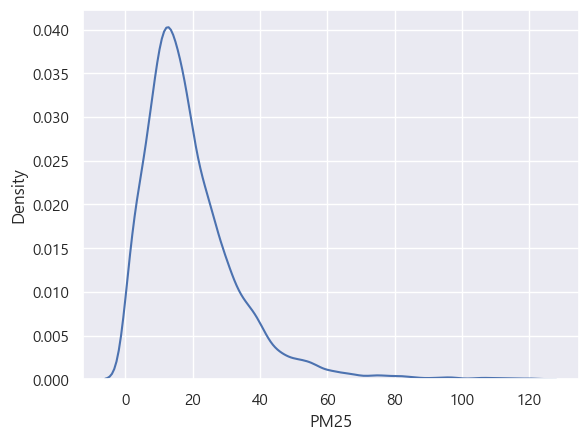

In [35]:
sns.kdeplot(temp)
plt.show()

위 정보로 부터 파악한 내용 정리

## **3.EDA 2단계 - 데이터 전처리**
- 진행한 개별 변수 분석에 맞추어 데이터를 전처리 하겠습니다.

### (1) air_22, air_23, weather_22, weather_23 데이터 전처리
* air_22, air_23  각각 '측정일시'를 활용하여 'time'변수 생성
    * 참고: 미세먼지 데이터는 1시-24시, 날씨 데이터는 0시-23시로 구성되어 있습니다. [2-3]에서 미세먼지와 날씨 데이터를 time 기준으로 합치려면 기준이 동일해야 합니다. 미세먼지 데이터에서 time 변수 생성 시 이를 미리 고려(예: air_22['측정일시'] -1)하세요.
* time 변수를 pd.to_datetime으로 데이터 타입 변경
    * 참고: format = '%Y%m%d%H'

#### 1) air_22, air_23 의 '측정일시'를 활용하여 'time' 변수 생성

In [36]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

air_22['time'] = air_22['측정일시']-1
air_22['time'] = pd.to_datetime(air_22['time'], format='%Y%m%d%H')

air_23['time'] = air_23['측정일시']-1
air_23['time'] = pd.to_datetime(air_23['time'], format='%Y%m%d%H')

In [37]:
# 결과확인
air_22.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19,2022-01-01 00:00:00
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19,2022-01-01 01:00:00
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19,2022-01-01 02:00:00
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19,2022-01-01 03:00:00
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19,2022-01-01 04:00:00


#### 2) weather_22, weather_23 의 '일시'를 활용하여 'time' 변수 생성
* weather_22, weather_23 의 '일시'를 활용하여 'time'변수 생성
* time 변수를 pd.to_datetime으로 데이터 타입 변경

In [38]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

weather_22['time'] = pd.to_datetime(weather_22['일시'])
weather_23['time'] = pd.to_datetime(weather_23['일시'])

In [39]:
# 결과확인
weather_22.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
0,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,...,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0,2022-01-01 00:00:00
1,108,서울,2022-01-01 01:00,-9.2,NaN,NaN,NaN,1.8,NaN,270,...,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0,2022-01-01 01:00:00
2,108,서울,2022-01-01 02:00,-9.5,NaN,NaN,NaN,1.2,NaN,270,...,2000,NaN,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0,2022-01-01 02:00:00
3,108,서울,2022-01-01 03:00,-9.3,NaN,NaN,NaN,1.4,NaN,290,...,2000,NaN,NaN,-7.6,NaN,-1.4,-1.2,-0.2,1.0,2022-01-01 03:00:00
4,108,서울,2022-01-01 04:00,-9.6,NaN,NaN,NaN,1.7,NaN,340,...,2000,NaN,NaN,-7.6,NaN,-1.4,-1.3,-0.3,1.0,2022-01-01 04:00:00


#### 3) 'time' 기준으로 데이터 합치기
* 미세먼지 데이터와 날씨 데이터를 'time' 기준으로 합쳐보세요.
    * df_22에는 'time' 기준으로 22년도 미세먼지, 날씨 데이터를 합쳐보세요.
    * df_23에는 'time' 기준으로 23년도 미세먼지, 날씨 데이터를 합쳐보세요.

In [40]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

df_22 = pd.merge(air_22, weather_22, how = 'inner', on= 'time')
df_23 = pd.merge(air_23, weather_23, how = 'inner', on= 'time')

In [41]:
# 결과확인
df_22.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,...,NaN,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,...,NaN,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.2,-0.2,1.0
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.3,-0.3,1.0


#### 4) 사용하지 않을 변수 제거

* 머신러닝에 사용하지 않을 변수들을 제거해줍니다.
    * df_22, df_23에 사용할 변수들만 넣어보세요.
* time 변수를 index로 세팅하고 (set_index) 데이터가 정렬되어 있지 않으므로 index 기준으로 정렬하세요. (sort_index)

In [42]:
# df_22, df_23에 사용할 변수들만 할당(예시)
use_cols = ['time','SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
df_22 = df_22[use_cols]
df_23 = df_23[use_cols]

In [43]:
# time 변수를 index로 세팅
df_22.set_index('time').sort_index()
df_23.set_index('time').sort_index()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),습도(%)
time,,,,,,,,,,
2023-01-01 00:00:00,0.0050,1.40,0.0020,0.0640,68.0,58.0,0.9,NaN,1.4,72
2023-01-01 01:00:00,0.0040,1.40,0.0020,0.0610,64.0,50.0,1.5,NaN,1.9,71
2023-01-01 02:00:00,0.0040,1.00,0.0020,0.0510,67.0,56.0,1.5,NaN,1.9,72
2023-01-01 03:00:00,0.0040,0.70,0.0120,0.0300,76.0,64.0,1.6,NaN,1.6,74
2023-01-01 04:00:00,0.0040,0.70,0.0210,0.0170,81.0,64.0,1.5,NaN,1.4,74
...,...,...,...,...,...,...,...,...,...,...
2023-08-31 19:00:00,0.0028,0.41,0.0306,0.0138,20.0,14.0,25.7,NaN,3.1,61
2023-08-31 20:00:00,0.0029,0.44,0.0209,0.0202,19.0,12.0,24.5,NaN,2.7,72
2023-08-31 21:00:00,0.0030,0.45,0.0141,0.0250,19.0,11.0,23.8,NaN,1.1,75


#### 5) 변수들의 결측치 처리

In [44]:
# df_22, df_23의 결측치 확인

df_22.isnull().sum()
df_23.isnull().sum()

time          0
SO2         244
CO           34
O3           61
NO2          34
PM10         40
PM25         39
기온(°C)        0
강수량(mm)    5023
풍속(m/s)       0
습도(%)         0
dtype: int64

In [45]:
# df_22, df_23의 변수 중 결측치를 처리 (ex: 강수량(mm))
# 제일 결측치가 많은 강수량 0으로 처리해보기

df_22['강수량(mm)'] = df_22['강수량(mm)'].fillna(0)
df_23['강수량(mm)'] = df_23['강수량(mm)'].fillna(0)

In [46]:
# df_22, df_23의 남은 결측치를 일괄 처리(ffill 활용--> 다른 방법으로 활용도 가능)

df_22 = df_22.fillna(method = 'ffill')
df_23 = df_23.fillna(method = 'ffill')

In [47]:
# df_22, df_23의 결측치 재확인 해보기

df_22.isnull().sum()
df_23.isnull().sum()

time       0
SO2        0
CO         0
O3         0
NO2        0
PM10       0
PM25       0
기온(°C)     0
강수량(mm)    0
풍속(m/s)    0
습도(%)      0
dtype: int64

#### 6) 전일 같은 시간 미세먼지 농도 변수 추가

* 먼저 df_22, df_23에 month, day, hour 변수를 추가하세요.
    * 예) dt.month, dt.day, dt.hour 사용 또는 datetimeindex에서는 df.index.month 등 사용 가능
* 모델링에 유용한 변수로 전일 같은 시간(24시간 전) 미세먼지 농도 변수를 추가하세요.
    * 시계열 데이터 처리를 위한 shift 연산을 참고하세요.

In [48]:
# df_22, df_23의 index(time)를 month, day, hour 로 쪼개기 (year는 필요 없음). 이후에 저장 시 index(time)은 포함하지 않음.

df_22['month'] = df_22['time'].dt.month
df_22['day'] = df_22['time'].dt.day
df_22['hour'] = df_22['time'].dt.hour

df_23['month'] = df_23['time'].dt.month
df_23['day'] = df_23['time'].dt.day
df_23['hour'] = df_23['time'].dt.hour

In [49]:
# 확인해보기
df_22.head()

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),습도(%),month,day,hour
0,2022-01-01 00:00:00,0.003,0.4,0.026,0.016,23.0,12.0,-8.5,0.0,1.9,41,1,1,0
1,2022-01-01 01:00:00,0.003,0.4,0.022,0.020,20.0,9.0,-9.2,0.0,1.8,42,1,1,1
2,2022-01-01 02:00:00,0.003,0.5,0.014,0.028,20.0,9.0,-9.5,0.0,1.2,43,1,1,2
3,2022-01-01 03:00:00,0.003,0.5,0.016,0.027,19.0,10.0,-9.3,0.0,1.4,46,1,1,3
4,2022-01-01 04:00:00,0.003,0.5,0.005,0.040,24.0,11.0,-9.6,0.0,1.7,48,1,1,4


In [50]:
# df_22, df_23에 전일 같은 시간 미세먼지 농도 변수(PM10_lag1) 추가
# 전일 같은 시간은 24시간 전 입니다. (shift 함수 활용)

df_22['PM10_lag1'] = df_22['PM10'].shift(24)
df_23['PM10_lag1'] = df_23['PM10'].shift(24)

In [51]:
#확인해보기!

df_22.tail()

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),습도(%),month,day,hour,PM10_lag1
8755,2022-12-31 19:00:00,0.004,1.5,0.002,0.070,71.0,59.0,-0.2,0.0,1.8,73,12,31,19,36.0
8756,2022-12-31 20:00:00,0.005,1.6,0.002,0.070,76.0,62.0,-0.8,0.0,1.4,75,12,31,20,40.0
8757,2022-12-31 21:00:00,0.004,1.7,0.002,0.072,76.0,66.0,-1.0,0.0,0.9,77,12,31,21,39.0
8758,2022-12-31 22:00:00,0.005,1.8,0.002,0.072,77.0,67.0,-0.8,0.0,0.5,78,12,31,22,38.0
8759,2022-12-31 23:00:00,0.004,1.6,0.002,0.070,76.0,67.0,-0.2,0.0,1.3,77,12,31,23,37.0


#### 7) t+1 시점의 미세먼지 농도 데이터 생성
* t+1 시점은 1시간 후 입니다.
* t+1 시점의 미세먼지 농도 변수(PM10_1)를 생성하세요.
* t+1 시점의 미세먼지 농도는 머신러닝 모델을 통해 예측하려는 y값(target) 입니다.

In [52]:
# df_22, df_23에 t+1 시점 변수(PM10_1) 추가
# shift 함수 활용 해보기!

df_22['PM10_1'] = df_22['PM10'].shift(-1)
df_23['PM10_1'] = df_23['PM10'].shift(-1)

In [53]:
#확인해보기!
df_22.head()

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),습도(%),month,day,hour,PM10_lag1,PM10_1
0,2022-01-01 00:00:00,0.003,0.4,0.026,0.016,23.0,12.0,-8.5,0.0,1.9,41,1,1,0,NaN,20.0
1,2022-01-01 01:00:00,0.003,0.4,0.022,0.020,20.0,9.0,-9.2,0.0,1.8,42,1,1,1,NaN,20.0
2,2022-01-01 02:00:00,0.003,0.5,0.014,0.028,20.0,9.0,-9.5,0.0,1.2,43,1,1,2,NaN,19.0
3,2022-01-01 03:00:00,0.003,0.5,0.016,0.027,19.0,10.0,-9.3,0.0,1.4,46,1,1,3,NaN,24.0
4,2022-01-01 04:00:00,0.003,0.5,0.005,0.040,24.0,11.0,-9.6,0.0,1.7,48,1,1,4,NaN,19.0


In [54]:
# 결측치가 있다면 처리

df_22.dropna(inplace=True)
df_23.dropna(inplace=True)

In [55]:
#확인해보기!
df_22.head()

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),습도(%),month,day,hour,PM10_lag1,PM10_1
24,2022-01-02 00:00:00,0.004,0.8,0.002,0.052,38.0,24.0,-2.8,0.0,2.3,55,1,2,0,23.0,34.0
25,2022-01-02 01:00:00,0.004,0.8,0.002,0.052,34.0,23.0,-2.9,0.0,2.1,57,1,2,1,20.0,35.0
26,2022-01-02 02:00:00,0.004,0.8,0.002,0.052,35.0,26.0,-2.6,0.0,1.9,57,1,2,2,20.0,33.0
27,2022-01-02 03:00:00,0.004,0.6,0.002,0.046,33.0,24.0,-2.1,0.0,2.5,56,1,2,3,19.0,33.0
28,2022-01-02 04:00:00,0.003,0.5,0.005,0.039,33.0,25.0,-1.9,0.0,2.0,55,1,2,4,24.0,32.0


### (2) train, test 데이터 분리 및 저장

* 22년도 데이터(df_22)를 train 데이터로 저장하세요. y 값을 제외하고 train_x로 저장한 후 y 값은 train_y로 저장하세요.
* 23년도 데이터(df_23)를 test 데이터로 저장하세요. y 값을 제외하고 test_x로 저장한 후 y 값은 test_y로 저장하세요.
* 각각의 데이터프레임을 csv 파일로 저장하세요. (train_x.csv / train_y.csv / test_x.csv / test_y.csv) (단, 인덱스 제외)
* y값은 'PM10_1' 즉, t+1 시점의 미세먼지 농도입니다.

In [56]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

train_x = df_22.drop(['PM10_1', 'time'], axis=1)
train_y = df_22['PM10_1']
test_x = df_23.drop(['PM10_1', 'time'], axis=1)
test_y = df_23['PM10_1']

In [57]:
# 각각의 데이터프레임을 csv 파일로 저장 (train_x.csv / train_y.csv / test_x.csv / test_y.csv)

train_x.to_csv('train_x.csv', index = False)
train_y.to_csv('train_y.csv', index = False)
test_x.to_csv('test_x.csv', index = False)
test_y.to_csv('test_y.csv', index = False)